**Objective**:

To classify the character images based on 20 different fonts. Each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.

Here we are planning to build a SVM to identify the information provided in CSV file which are related to the 26 capital letters in the English alphabet.


Below mentioned are more details on the dataset.

1. Title: Letter Image Recognition Data 

2. Source Information
   -- Creator: David J. Slate
     -- Odesta Corporation; 1890 Maple Ave; Suite 115; Evanston, IL 60201
   -- Donor: David J. Slate (dave@math.nwu.edu) (708) 491-3867   
   -- Date: January, 1991

3. Past Usage:
   -- P. W. Frey and D. J. Slate (Machine Learning Vol 6 #2 March 91):
	"Letter Recognition Using Holland-style Adaptive Classifiers".

   	The research for this article investigated the ability of several
	variations of Holland-style adaptive classifier systems to learn to
	correctly guess the letter categories associated with vectors of 16
	integer attributes extracted from raster scan images of the letters.
	The best accuracy obtained was a little over 80%.  It would be
	interesting to see how well other methods do with the same data.

4. Relevant Information:

   The objective is to identify each of a large number of black-and-white
   rectangular pixel displays as one of the 26 capital letters in the English
   alphabet.  The character images were based on 20 different fonts and each
   letter within these 20 fonts was randomly distorted to produce a file of
   20,000 unique stimuli.  Each stimulus was converted into 16 primitive
   numerical attributes (statistical moments and edge counts) which were then
   scaled to fit into a range of integer values from 0 through 15.  We
   typically train on the first 16000 items and then use the resulting model
   to predict the letter category for the remaining 4000.  See the article
   cited above for more details.

5. Number of Instances: 20000

6. Number of Attributes: 17 (Letter category and 16 numeric features)

7. Attribute Information:
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)

Reference : https://github.com/mikeizbicki/datasets/blob/master/csv/uci/letter-recognition.names

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 

In [27]:
#test dataset V/S predictions
def getAccuracy(test_data, pred_data):
	correct_pred = 0
	for x in range(len(test_data)):
		if test_data[x]== pred_data[x]:
			correct_pred += 1
	return (correct_pred/float(len(test_data))) * 100.0

In [28]:
letterData = pd.read_csv("/content/drive/MyDrive/MachineLearning/SuperVisedLearning/SVM/letterdata.csv")
letterData.head(10) # all fields except the target ("letter") are numeric. We do not know the scale. So normalize

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


Check the data count and the also look for any missing values

In [29]:
letterData.isnull().sum() 

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [30]:
letterData.groupby(['letter']).count()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,789,789,789,789,789,789,789,789,789,789,789,789,789,789,789,789
B,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766
C,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736
D,805,805,805,805,805,805,805,805,805,805,805,805,805,805,805,805
E,768,768,768,768,768,768,768,768,768,768,768,768,768,768,768,768
F,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775,775
G,773,773,773,773,773,773,773,773,773,773,773,773,773,773,773,773
H,734,734,734,734,734,734,734,734,734,734,734,734,734,734,734,734
I,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755


## Split Data

In [31]:
X,y = np.array(letterData)[ :, 1:16], np.array(letterData.letter)[:]   # note for y, extracting all rows of "letter" col

In [32]:
X_train = X[:16000, :]
X_test = X[16001: , :]
y_train = y[:16000]
y_test = y[16001:]

## Build Model

In [33]:
svm_clf = svm.SVC(gamma=0.025, C=3)    

gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications. 

In [34]:
svm_clf.fit(X_train , y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred = svm_clf.predict(X_test)

In [36]:
getAccuracy(y_test , y_pred)   # Calling getAccuracy function instead of usinig array comparison to get the %age accuracy

96.07401850462615

In [37]:
y_grid = (np.column_stack([y_test, y_pred]))

In [38]:
print(y_grid)

[['N' 'N']
 ['V' 'V']
 ['I' 'I']
 ...
 ['T' 'T']
 ['S' 'S']
 ['A' 'A']]


In below cell we save the test and prediction data to a CSV file. 

In [42]:
np.savetxt("ocr.csv", y_grid , fmt='%s')

In [45]:
import string
letter= list(string.ascii_uppercase[0:26])
plab=["Prd "+l for l in letter]

In below cell we can see how the model performed and we can do manual analysis based on this report.

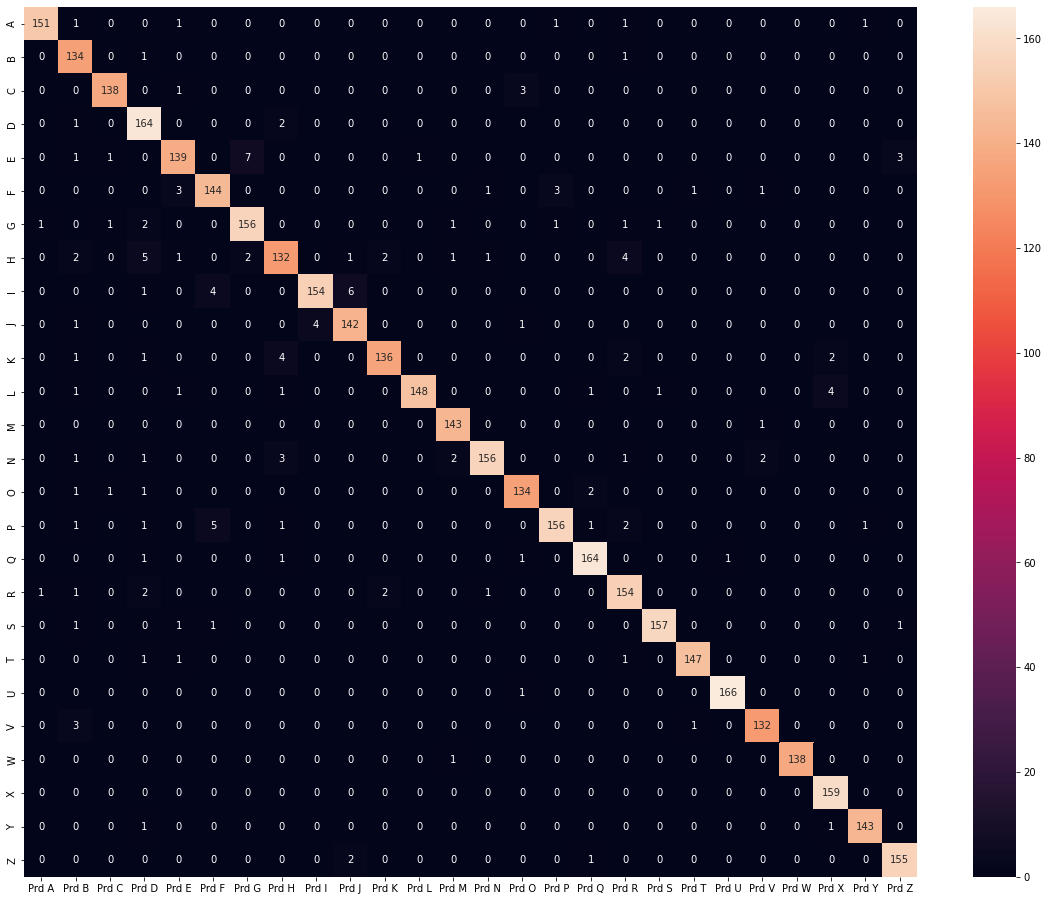

In [46]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(y_test, y_pred, labels=lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot=True ,fmt='g')